# Intermediate Importing Data in Python

**Descripción del curso**

Como científico de datos, necesitará limpiar los datos, discutirlos y mezclarlos, visualizarlos, construir modelos predictivos e interpretar estos modelos. Sin embargo, antes de poder hacerlo, deberá saber cómo introducir datos en Python. En la precuela de este curso, aprendió muchas formas de importar datos a Python: desde archivos planos como .txt y .csv; desde archivos nativos de otro software como hojas de cálculo de Excel, archivos Stata, SAS y MATLAB; y de bases de datos relacionales como SQLite y PostgreSQL.

En este curso, ampliará esta base de conocimientos aprendiendo a importar datos de la web y extrayendo datos de interfaces de programación de aplicaciones, API, como la API de transmisión de Twitter, que nos permite transmitir tweets en tiempo real. 

## 1. Importing data from the Internet

In [4]:
# Python BeutifulSoup -- Analizar el hmtl y convertirlo en datos
# University of California, Irvine's Machine Learning repository.
# http://archive.ics.uci.edu/ml/index.html

### Importing flat files from the web

In [3]:
from urllib.request import urlretrieve

import pandas as pd
url = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'
file = '../datasets/winequality-red.csv'
urlretrieve(url,file) # Guarda el archivo en la maquina

df = pd.read_csv(file, sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Trabajar con la informacion sin bajarla de la web
url = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'
df = pd.read_csv(url, sep = ';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [16]:
url = 'http://s3.amazonaws.com/assets.datacamp.com/course/importing_data_into_r/latitude.xls'
xls = pd.read_excel(url, sheet_name=None)
print(xls.keys())
xls['1700'].head()

dict_keys(['1700', '1900'])


,country,1700
0,Afghanistan,34.565000
1,Akrotiri and Dhekelia,34.616667
2,Albania,41.312000
3,Algeria,36.720000
4,American Samoa,-14.307000


### HTTP requests to import files from the web

In [22]:
#  Hacer ping a servidores de DataCamp

from urllib.request import urlopen, Request
url = "https://campus.datacamp.com/courses/1606/4135?ex=2"

request = Request(url) # Empaquetando la solicitud GET y enviando solicitud
response = urlopen(request) # Capturando la rpta del get 
# response: Devuelve un objeto HTTPResponse que tiene un metodo de lectura asociado
html = response.read() # Devuelve el html como una cadena

print(type(response), '\n')
# print(html)
response.close() # Cerrar la rpta

<class 'http.client.HTTPResponse'> 



In [23]:
import requests

url = "http://www.datacamp.com/teach/documentation"
r = requests.get(url)

text = r.text
print(text)

<!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js ie6 oldie" lang="en-US"> <![endif]-->
<!--[if IE 7]>    <html class="no-js ie7 oldie" lang="en-US"> <![endif]-->
<!--[if IE 8]>    <html class="no-js ie8 oldie" lang="en-US"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-US"> <!--<![endif]-->
<head>

<title>Attention Required! | Cloudflare</title>

<meta name="captcha-bypass" id="captcha-bypass" />
<meta charset="UTF-8" />
<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />
<meta http-equiv="X-UA-Compatible" content="IE=Edge,chrome=1" />
<meta name="robots" content="noindex, nofollow" />
<meta name="viewport" content="width=device-width,initial-scale=1" />
<link rel="stylesheet" id="cf_styles-css" href="/cdn-cgi/styles/cf.errors.css" type="text/css" media="screen,projection" />
<!--[if lt IE 9]><link rel="stylesheet" id='cf_styles-ie-css' href="/cdn-cgi/styles/cf.errors.ie.css" type="text/css" media="screen,projection" /><![endif]-->
<style type="

### Scraping the web in Python

In [4]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.python.org/~guido/'
r = requests.get(url) #  Empaqueta la solicitud, envía la solicitud y obtiene la respuesta: r
html_doc = r.text  # Extrae la respuesta como html
soup = BeautifulSoup(html_doc) # Crea un objeto BeautifulSoup a partir del HTML
guido_title = soup.title # Obtenga el título de la página web de Guido
guido_text = soup.get_text() # Obtener el texto 
print(guido_title)
# print(guido_text)

pretty_soup = soup.prettify()
# print(pretty_soup)

a_tags = soup.find_all('a')
for link in a_tags:
    print(link.get('href'))

<title>Guido's Personal Home Page</title>
pics.html
pics.html
http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm
images/df20000406.jpg
http://neopythonic.blogspot.com/2016/04/kings-day-speech.html
http://www.python.org
Resume.html
Publications.html
bio.html
http://legacy.python.org/doc/essays/
http://legacy.python.org/doc/essays/ppt/
interviews.html
pics.html
http://neopythonic.blogspot.com
http://www.artima.com/weblogs/index.jsp?blogger=12088
https://twitter.com/gvanrossum
Resume.html
guido.au
http://legacy.python.org/doc/essays/
images/license.jpg
http://www.cnpbagwell.com/audio-faq
http://sox.sourceforge.net/
images/internetdog.gif


## 2. Interacting with APIs to import data from the web

### Introduction to APIs and JSONs

In [5]:
file = '../datasets/a_movie.json'

In [8]:
import json
with open(file) as json_file:
    json_data = json.load(json_file)
print(json_data['Title'])

The Social Network


In [9]:
with open(file) as json_file:
    json_data = json.load(json_file)

# Print each key-value pair in json_data
for k in json_data.keys():
    print(k + ': ', json_data[k])

Title:  The Social Network
Year:  2010
Rated:  PG-13
Released:  01 Oct 2010
Runtime:  120 min
Genre:  Biography, Drama
Director:  David Fincher
Writer:  Aaron Sorkin (screenplay), Ben Mezrich (book)
Actors:  Jesse Eisenberg, Rooney Mara, Bryan Barter, Dustin Fitzsimons
Plot:  As Harvard student Mark Zuckerberg creates the social networking site that would become known as Facebook, he is sued by the twins who claimed he stole their idea, and by the co-founder who was later squeezed out of the business.
Language:  English, French
Country:  USA
Awards:  Won 3 Oscars. Another 168 wins & 186 nominations.
Poster:  https://m.media-amazon.com/images/M/MV5BOGUyZDUxZjEtMmIzMC00MzlmLTg4MGItZWJmMzBhZjE0Mjc1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg
Ratings:  [{'Source': 'Internet Movie Database', 'Value': '7.7/10'}, {'Source': 'Rotten Tomatoes', 'Value': '96%'}, {'Source': 'Metacritic', 'Value': '95/100'}]
Metascore:  95
imdbRating:  7.7
imdbVotes:  630,681
imdbID:  tt1285016
Type:  movie
DVD:  05

### APIs and interacting with the world wide web

In [10]:
import requests
url = 'http://www.omdbapi.com/?apikey=72bc447a&t=the+social+network'
r = requests.get(url)
print(r.text)

{"Title":"The Social Network","Year":"2010","Rated":"PG-13","Released":"01 Oct 2010","Runtime":"120 min","Genre":"Biography, Drama","Director":"David Fincher","Writer":"Aaron Sorkin (screenplay), Ben Mezrich (book)","Actors":"Jesse Eisenberg, Rooney Mara, Bryan Barter, Dustin Fitzsimons","Plot":"As Harvard student Mark Zuckerberg creates the social networking site that would become known as Facebook, he is sued by the twins who claimed he stole their idea, and by the co-founder who was later squeezed out of the business.","Language":"English, French","Country":"USA","Awards":"Won 3 Oscars. Another 168 wins & 186 nominations.","Poster":"https://m.media-amazon.com/images/M/MV5BOGUyZDUxZjEtMmIzMC00MzlmLTg4MGItZWJmMzBhZjE0Mjc1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg","Ratings":[{"Source":"Internet Movie Database","Value":"7.7/10"},{"Source":"Rotten Tomatoes","Value":"96%"},{"Source":"Metacritic","Value":"95/100"}],"Metascore":"95","imdbRating":"7.7","imdbVotes":"630,681","imdbID":"tt1285

In [11]:
json_data = r.json()
for k in json_data.keys():
    print(k + ': ', json_data[k])

Title:  The Social Network
Year:  2010
Rated:  PG-13
Released:  01 Oct 2010
Runtime:  120 min
Genre:  Biography, Drama
Director:  David Fincher
Writer:  Aaron Sorkin (screenplay), Ben Mezrich (book)
Actors:  Jesse Eisenberg, Rooney Mara, Bryan Barter, Dustin Fitzsimons
Plot:  As Harvard student Mark Zuckerberg creates the social networking site that would become known as Facebook, he is sued by the twins who claimed he stole their idea, and by the co-founder who was later squeezed out of the business.
Language:  English, French
Country:  USA
Awards:  Won 3 Oscars. Another 168 wins & 186 nominations.
Poster:  https://m.media-amazon.com/images/M/MV5BOGUyZDUxZjEtMmIzMC00MzlmLTg4MGItZWJmMzBhZjE0Mjc1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg
Ratings:  [{'Source': 'Internet Movie Database', 'Value': '7.7/10'}, {'Source': 'Rotten Tomatoes', 'Value': '96%'}, {'Source': 'Metacritic', 'Value': '95/100'}]
Metascore:  95
imdbRating:  7.7
imdbVotes:  630,681
imdbID:  tt1285016
Type:  movie
DVD:  05

In [12]:
# API DE WIKIPEDIA
# https://www.mediawiki.org/wiki/API:Main_page

In [13]:
import requests
url = 'https://en.wikipedia.org/w/api.php?action=query&prop=extracts&format=json&exintro=&titles=pizza'
r = requests.get(url)
json_data = r.json()

pizza_extract = json_data['query']['pages']['24768']['extract']
print(pizza_extract)

<p class="mw-empty-elt">
</p>
<p><b>Pizza</b> (<small>Italian: </small><span title="Representation in the International Phonetic Alphabet (IPA)">[ˈpittsa]</span>, <small>Neapolitan: </small><span title="Representation in the International Phonetic Alphabet (IPA)">[ˈpittsə]</span>) is a savory dish of Italian origin consisting of a usually round, flattened base of leavened wheat-based dough topped with tomatoes, cheese, and often various other ingredients (such as anchovies, mushrooms, onions, olives, pineapple, meat, etc.), which is then baked at a high temperature, traditionally in a wood-fired oven. A small pizza is sometimes called a pizzetta. A person who makes pizza is known as a <b>pizzaiolo</b>.
</p><p>In Italy, pizza served in formal settings, such as at a restaurant, is presented unsliced, and is eaten with the use of a knife and fork. In casual settings, however, it is cut into wedges to be eaten while held in the hand.
</p><p>The term <i>pizza</i> was first recorded in the 1

## 3. Diving deep into the Twitter API

### The Twitter API and Authentication

In [16]:
# Twitter App
# https://developer.twitter.com/en/apps

In [15]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [17]:
import tweepy

# Configurado sus credenciales de autenticación

#  Almacene las credenciales de autenticación de OAuth 
access_token = "1092294848-aHN7DcRP9B4VMTQIhwqOYiB14YkW92fFO8k8EPy"
access_token_secret = "X4dHmhPfaksHcQ7SCbmZa2oYBBVSD2g8uIHXsp5CTaksx"
consumer_key = "nZ6EA0FxZ293SxGNg8g8aP0HM"
consumer_secret = "fJGEodwe3KiKUnsYJC3VRndj7jevVvXbK2D5EiJ2nehafRgA6i"

# Pasar los detalles de OAuth al controlador de OAuth de tweepy 
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token,access_token_secret)

In [ ]:
# funcion MyStreamListener
# https://gist.github.com/hugobowne/18f1c0c0709ed1a52dc5bcd462ac69f4

In [18]:
class MyStreamListener(tweepy.StreamListener):
    def __init__(self, api=None):
        super(MyStreamListener, self).__init__()
        self.num_tweets = 0
        self.file = open("tweets.txt", "w")

    def on_status(self, status):
        tweet = status._json
        self.file.write( json.dumps(tweet) + '\n' )
        self.num_tweets += 1
        if self.num_tweets < 100:
            return True
        else:
            return False
        self.file.close()

    def on_error(self, status):
        print(status)

In [28]:
# l = MyStreamListener()
# stream = tweepy.Stream(auth, l)
# stream.filter(['clinton','trump','sanders','cruz'])

In [20]:
import json
tweets_data_path = '../datasets/tweets.txt'

tweets_data = []
tweets_file = open(tweets_data_path, "r")

for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

tweets_file.close()

print(tweets_data[0].keys())

dict_keys(['in_reply_to_user_id', 'created_at', 'filter_level', 'truncated', 'possibly_sensitive', 'timestamp_ms', 'user', 'text', 'extended_entities', 'in_reply_to_status_id', 'entities', 'favorited', 'retweeted', 'is_quote_status', 'id', 'favorite_count', 'retweeted_status', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'id_str', 'in_reply_to_screen_name', 'coordinates', 'lang', 'place', 'contributors', 'geo', 'retweet_count', 'source'])


In [21]:
import pandas as pd
# Extraer el texto y el idioma de cada tweet
df = pd.DataFrame(tweets_data, columns=['text', 'lang'])
print(df.head())

                                                text lang
0  RT @bpolitics: .@krollbondrating's Christopher...   en
1  RT @HeidiAlpine: @dmartosko Cruz video found.....   en
2  Njihuni me Zonjën Trump !!! | Ekskluzive https...   et
3  Your an idiot she shouldn't have tried to grab...   en
4  RT @AlanLohner: The anti-American D.C. elites ...   en


In [22]:
# Analisis de texto en twitter
import re

def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)

    if match:
        return True
    return False

In [23]:
[clinton, trump, sanders, cruz] = [0, 0, 0, 0]

# Iterate through df, counting the number of tweets in which
# each candidate is mentioned
for index, row in df.iterrows():
    clinton += word_in_text('clinton', row['text'])
    trump += word_in_text('trump', row['text'])
    sanders += word_in_text('sanders', row['text'])
    cruz += word_in_text('cruz', row['text'])

In [26]:
clinton, trump, sanders, cruz

(9, 77, 6, 14)

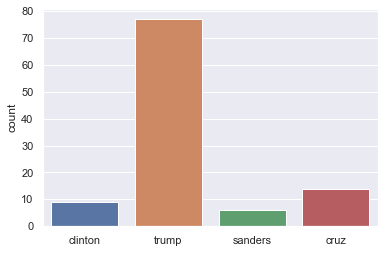

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)
cd = ['clinton', 'trump', 'sanders', 'cruz']

ax = sns.barplot(cd, [clinton, trump, sanders, cruz])
ax.set(ylabel="count")
plt.show()